# Final Project: Report on Data Analysis Technique

Hey everyone! For this assignment, you will be working in groups to analyze a dataset using various data analysis techniques. Here's what you need to do:

**Objective:**
1. Dataset Selection
Get together with your group and choose a dataset that interests all of you. It can be the same dataset as last time or a completely new one.

2. Data Analysis Techniques
Apply any one or more of the following data analysis techniques to your chosen dataset:
- Apriori Algorithm
- Clustering
    - K-means
    - EM Clustering
    - DBScan Clustering
    - SLINK Clustering
- Linear Regression

3. Data Preparation
Once you have your dataset, make sure it's ready for analysis. Clean the data, handle missing values, and prepare it for the chosen analysis technique.

4. Analysis and Insights
Use the selected technique to analyze the dataset. Dive deep into the insights and patterns that emerge from your analysis.

5. Presentation Preparation
Prepare a presentation to showcase your findings to the class. Create visualizations on both the descriptive statistics and the results of your analysis and provide clear explanations for the insights you've gathered. Take note of the suggestions and recommendations I've outlined regarding visualizing data from your midterm project.

6. Presentation Recording
Since we will be presenting online, pre-record your presentation to ensure it's within 10-12 minutes. Keep it concise and engaging for your audience.

7. Grading Criteria
Your assignment will be graded based on the following criteria:
 Analysis Technique (30%)

Alignment of the chosen analysis technique with the dataset and research question.
Depth and Quality of Insights (30%)

Clear interpretation of results with meaningful insights.
Exploration of patterns, trends, or anomalies in the data.
Data Visualization (15%)

Appropriate use of charts and graphs for the given data.

Creativity and Novelty (15%)

Presentation of unique or surprising findings.
Exploration of creative approaches to the problem or dataset.
Presentation Quality (10%)

Clarity and coherence of the presentation.
Use of effective visualizations to explain findings.
Engagement and conciseness in delivering the recorded presentation.
Remember to collaborate effectively with your group members and have fun exploring and analyzing your chosen dataset! If you have any questions, feel free to reach out to me. Final presentations will be on December 9, 2024 from 4 PM to 7PM. If any groups haven't finished by then, there will be one final presentation on December 11, 2024.

For your submission, include a link to your video (make sure it is publicly accessible) as well as a document detailing the individual contributions of each member.

Good luck!

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
# Cleaning the csv file and creating cleaned csv files
df = pd.read_csv('employment_rates.csv', delimiter=';', skiprows=2, encoding='utf-8', na_values=[".."])

df.columns = [
    "Year", 
    "Month", 
    "Labor Force Participation Rate", 
    "Employment Rate", 
    "Unemployment Rate", 
    "Underemployment Rate", 
    "Visible Underemployment Rate"
]

# quarter_map = {
#     "January": "Q1",
#     "April": "Q2",
#     "July": "Q3",
#     "October": "Q4",
# }

quarter_map = {
    "January": "Q1", "February": "Q1", "March": "Q1",
    "April": "Q2", "May": "Q2", "June": "Q2",
    "July": "Q3", "August": "Q3", "September": "Q3",
    "October": "Q4", "November": "Q4", "December": "Q4"
}

month_map = {
    "January": 1,
    "February": 2,
    "March": 3,
    "April": 4,
    "May": 5,
    "June": 6,
    "July": 7,
    "August": 8,
    "September": 9,
    "October": 10,
    "November": 11,
    "December": 12
}

df["MonthNum"] = df["Month"].map(month_map)

df.fillna(0, inplace=True)

df["Quarter"] = df["Month"].map(quarter_map)

df.sort_values(by=["Year", "MonthNum"], inplace=True)

monthly_data = df[(df["Month"] != "Annual") & (df["Year"] != 2024)]
annual_data = df[(df["Month"] == "Annual") & (df["Year"] != 2024)]

monthly_data.to_csv("MonthlyLaborForceData.csv", index=False)
annual_data.to_csv("AnnualLaborForceData.csv", index=False)

df.to_csv("CleanedLaborForceData.csv", index=False)


In [18]:
# Filling the 0 values by copying the previous month and update quarterly trend
df = pd.read_csv('MonthlyLaborForceData.csv')

columns_to_check = [
    'Labor Force Participation Rate',
    'Employment Rate',
    'Unemployment Rate',
    'Underemployment Rate',
    'Visible Underemployment Rate'
]

for year in range(2005, 2021):
    year_data = df[df['Year'] == year].sort_values(by=['MonthNum'])
    
    last_valid_data = None
    
    for month_name in list(month_map.keys()):
        month_data = year_data[year_data['Month'] == month_name]
        
        if not month_data.empty:
            if (month_data[columns_to_check] == 0).any(axis=None):

                df = df[~((df['Year'] == year) & (df['Month'] == month_name))]
                
                if last_valid_data is not None:
                    missing_data = last_valid_data.copy()
                    missing_data['Month'] = month_name
                    
                    df = pd.concat([df, missing_data.to_frame().T], ignore_index=True)
            else:
                last_valid_data = month_data.iloc[0]
        else:
            if last_valid_data is not None:
                missing_data = last_valid_data.copy()
                missing_data['Month'] = month_name
                
                df = pd.concat([df, missing_data.to_frame().T], ignore_index=True)

df['MonthNum'] = df['Month'].map(month_map)
df = df.sort_values(by=['Year', 'MonthNum'])

df.reset_index(drop=True, inplace=True)

df.to_csv('UpdatedMonthlyLaborForceData.csv', index=False)

print(df.head())

monthly_data = df[(df["Month"] != "Annual") & (df["Year"] != 2024)]


   Year     Month Labor Force Participation Rate Employment Rate  \
0  2005   January                           66.0            88.6   
1  2005  February                           66.0            88.6   
2  2005     March                           66.0            88.6   
3  2005     April                          65.37           91.72   
4  2005       May                          65.37           91.72   

  Unemployment Rate Underemployment Rate Visible Underemployment Rate  \
0              11.4                 16.0                          9.8   
1              11.4                 16.0                          9.8   
2              11.4                 16.0                          9.8   
3              8.28                25.76                        13.97   
4              8.28                25.76                        13.97   

   MonthNum Quarter  
0         1      Q1  
1         2      Q1  
2         3      Q1  
3         4      Q2  
4         5      Q2  


In [19]:
monthly_data = pd.read_csv('UpdatedMonthlyLaborForceData.csv')
annual_data = pd.read_csv('AnnualLaborForceData.csv')

monthly_descriptive_stats = monthly_data.describe()

annual_descriptive_stats = annual_data.describe()

print("Monthly Data Descriptive Statistics:")
print(monthly_descriptive_stats)

print("\nAnnual Data Descriptive Statistics:")
print(annual_descriptive_stats)

Monthly Data Descriptive Statistics:
              Year  Labor Force Participation Rate  Employment Rate  \
count   228.000000                      228.000000       228.000000   
mean   2014.000000                       63.445746        93.160175   
std       5.489277                        1.834125         1.830308   
min    2005.000000                       55.690000        82.400000   
25%    2009.000000                       63.170000        92.460000   
50%    2014.000000                       63.830000        93.040000   
75%    2019.000000                       64.500000        94.390000   
max    2023.000000                       67.450000        96.930000   

       Unemployment Rate  Underemployment Rate  Visible Underemployment Rate  \
count         228.000000            228.000000                     228.00000   
mean            6.839781             17.893553                      10.85250   
std             1.830367              2.944359                       1.82189   
min

In [20]:
rate_columns = ['Labor Force Participation Rate', 'Employment Rate', 'Unemployment Rate', 'Underemployment Rate', 'Visible Underemployment Rate']

descriptive_stats = annual_data[rate_columns].agg(['mean', 'median', 'std', 'min', 'max'])

descriptive_stats = descriptive_stats.T

descriptive_stats.index.name = 'Rates'

print(descriptive_stats)

                                     mean  median       std    min    max
Rates                                                                    
Labor Force Participation Rate  63.435789   63.97  1.552172  59.52  65.25
Employment Rate                 93.217895   92.96  1.358870  89.74  95.65
Unemployment Rate                6.782105    7.04  1.358870   4.35  10.26
Underemployment Rate            17.965263   18.69  2.718491  12.34  22.58
Visible Underemployment Rate    10.884737   11.33  1.611633   7.83  13.88


Data before datetime conversion:
   Year  Month  Day
0  2005      1    1
1  2005      2    1
2  2005      3    1
3  2005      4    1
4  2005      5    1
Datetime conversion successful!

Checking if 'Date' column exists:
Index(['Year', 'Month', 'Labor Force Participation Rate', 'Employment Rate',
       'Unemployment Rate', 'Underemployment Rate',
       'Visible Underemployment Rate', 'MonthNum', 'Quarter', 'Day', 'Date'],
      dtype='object')


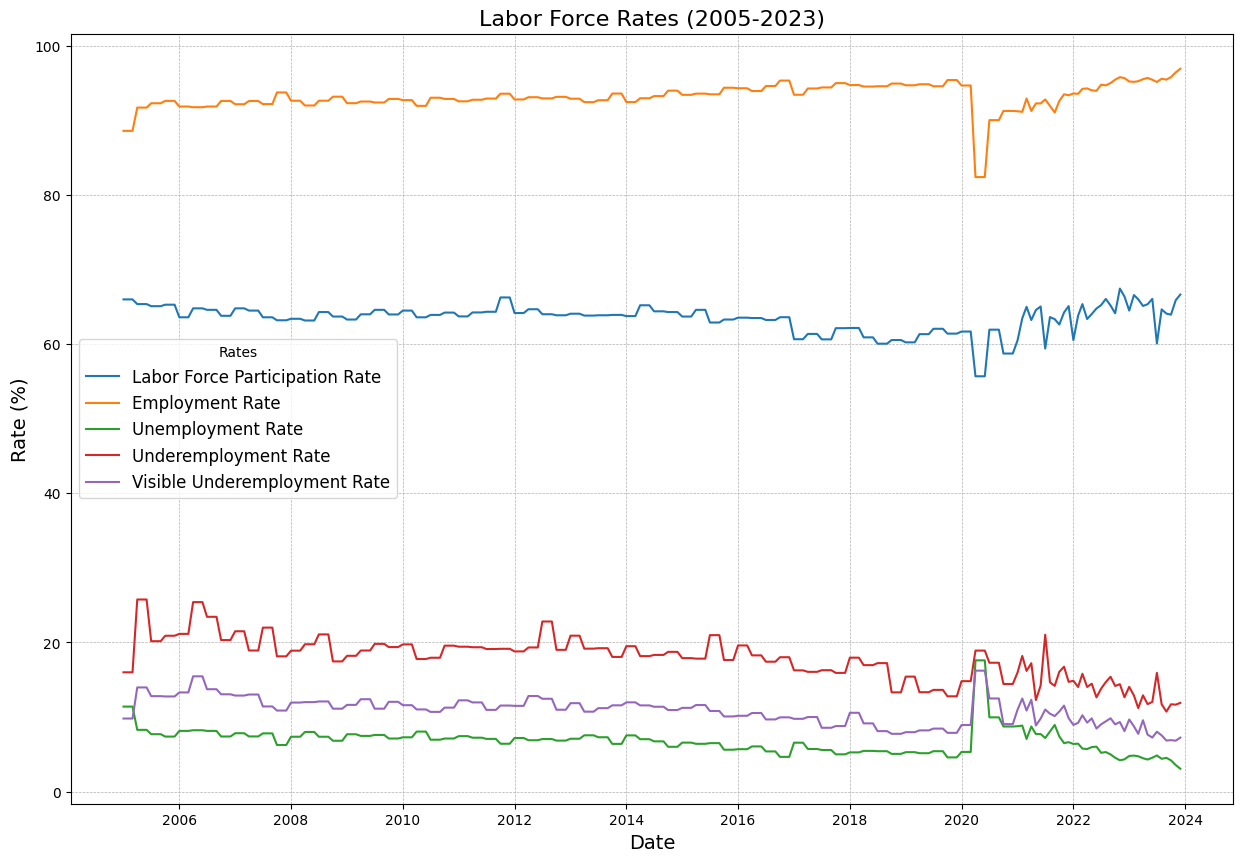

In [21]:
# Load the CSV file
labor_data = pd.read_csv('UpdatedMonthlyLaborForceData.csv')

# Ensure 'Year' and 'Month' are numeric, drop invalid rows
labor_data['Year'] = pd.to_numeric(labor_data['Year'], errors='coerce')
labor_data['Month'] = labor_data['Month'].apply(lambda x: pd.to_datetime(x, format='%B').month)  # Convert month names to numbers
labor_data = labor_data.dropna(subset=['Year', 'Month'])

# Add a 'Day' column (default to 1 for monthly data)
labor_data['Day'] = 1

# Check the data before datetime conversion
print("Data before datetime conversion:")
print(labor_data[['Year', 'Month', 'Day']].head())

# Convert 'Year', 'Month', and 'Day' into a datetime column
try:
    labor_data['Date'] = pd.to_datetime(labor_data[['Year', 'Month', 'Day']], errors='coerce')
    print("Datetime conversion successful!")
except Exception as e:
    print("Error during datetime conversion:", e)

# Check if 'Date' was created successfully
print("\nChecking if 'Date' column exists:")
print(labor_data.columns)

# Ensure the 'Date' column exists after conversion
if 'Date' not in labor_data.columns or labor_data['Date'].isnull().all():
    raise KeyError("Column 'Date' was not created successfully or contains NaT values.")

# Set 'Date' as the index
labor_data.set_index('Date', inplace=True)

# Specify the columns to plot
columns_to_plot = [
    'Labor Force Participation Rate',
    'Employment Rate',
    'Unemployment Rate',
    'Underemployment Rate',
    'Visible Underemployment Rate'
]

# Plot the data
plt.figure(figsize=(15, 10))

for column in columns_to_plot:
    if column in labor_data.columns:  # Ensure the column exists before plotting
        plt.plot(labor_data.index, labor_data[column], label=column)
    else:
        print(f"Warning: Column '{column}' not found in data.")

# Configure plot aesthetics
plt.title('Labor Force Rates (2005-2023)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Rate (%)', fontsize=14)
plt.legend(title='Rates', fontsize=12)
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.show()


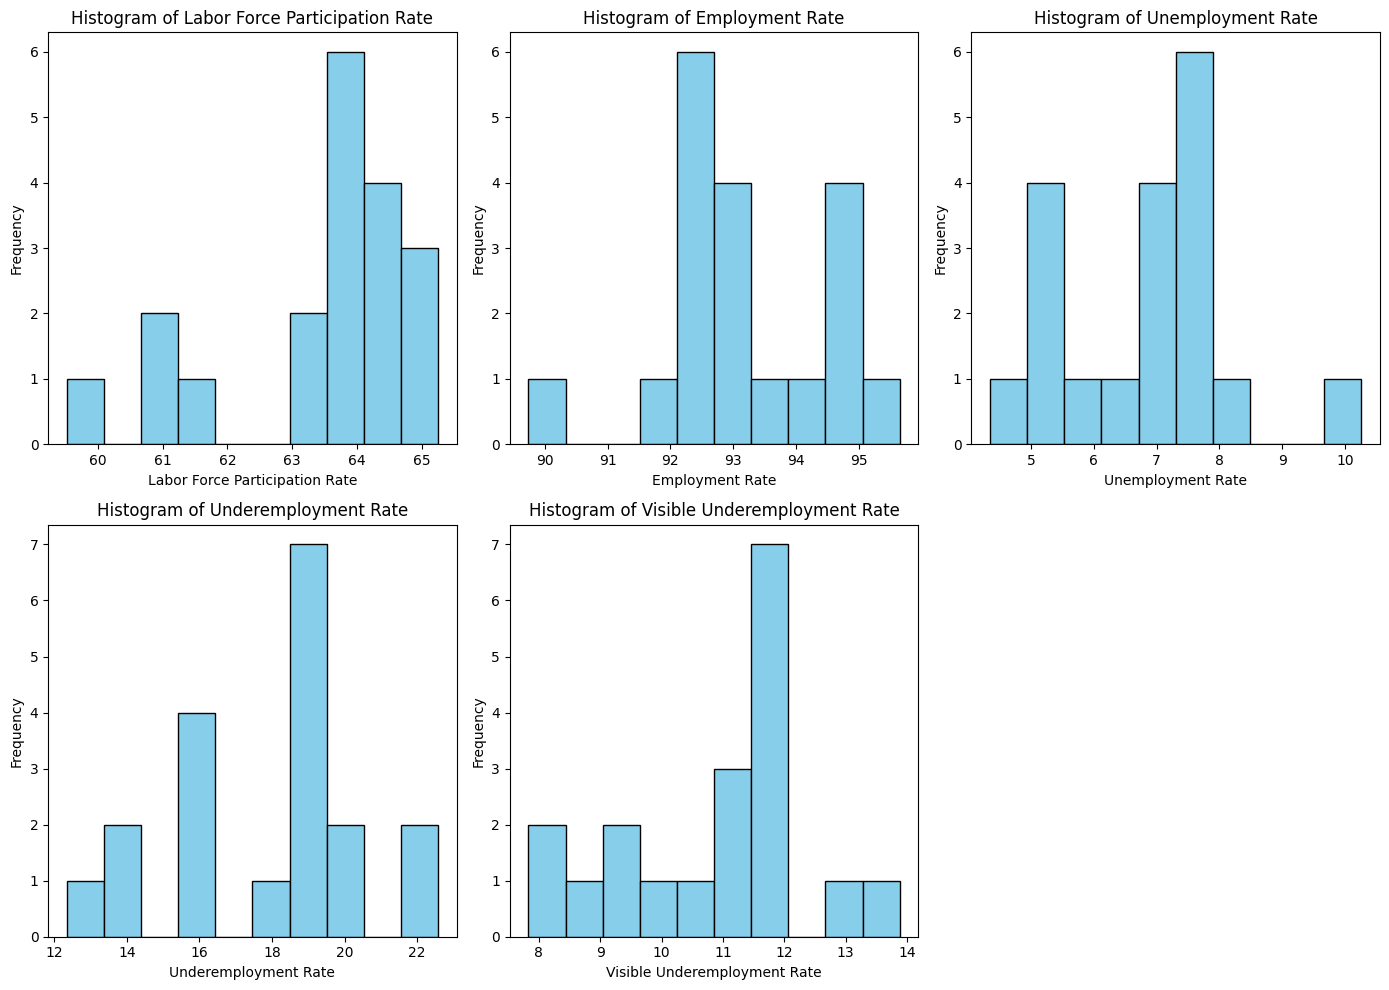

In [22]:
columns_of_interest = [
    'Labor Force Participation Rate',
    'Employment Rate',
    'Unemployment Rate',
    'Underemployment Rate',
    'Visible Underemployment Rate'
]

# Set up the figure with multiple subplots
plt.figure(figsize=(14, 10))

# Iterate over each column and create a histogram
for i, column in enumerate(columns_of_interest, 1):
    plt.subplot(2, 3, i)  # Create 2x3 grid for histograms
    plt.hist(annual_data[column], bins=10, color='skyblue', edgecolor='black')  # Adjust bins as needed
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

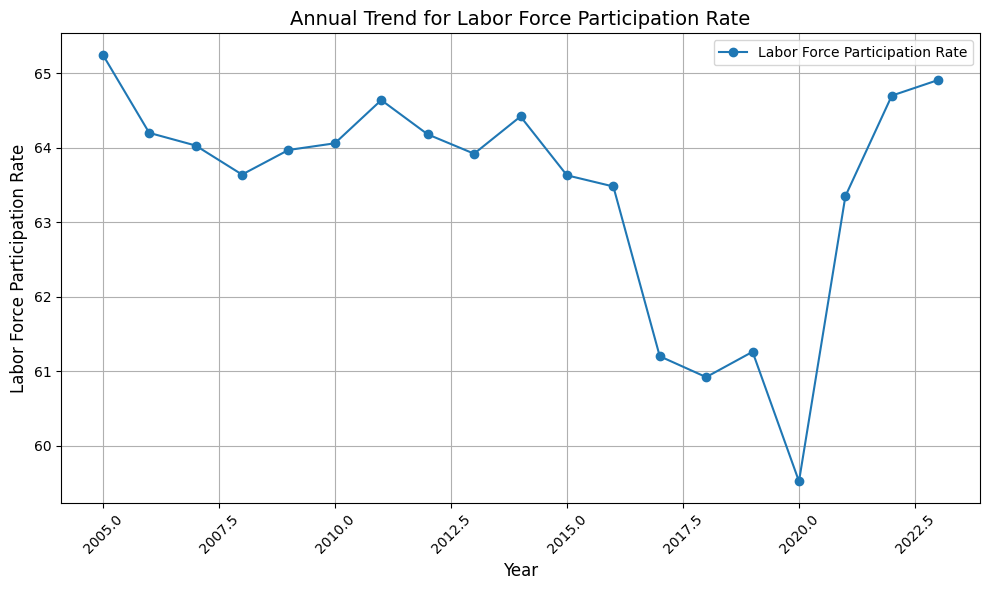

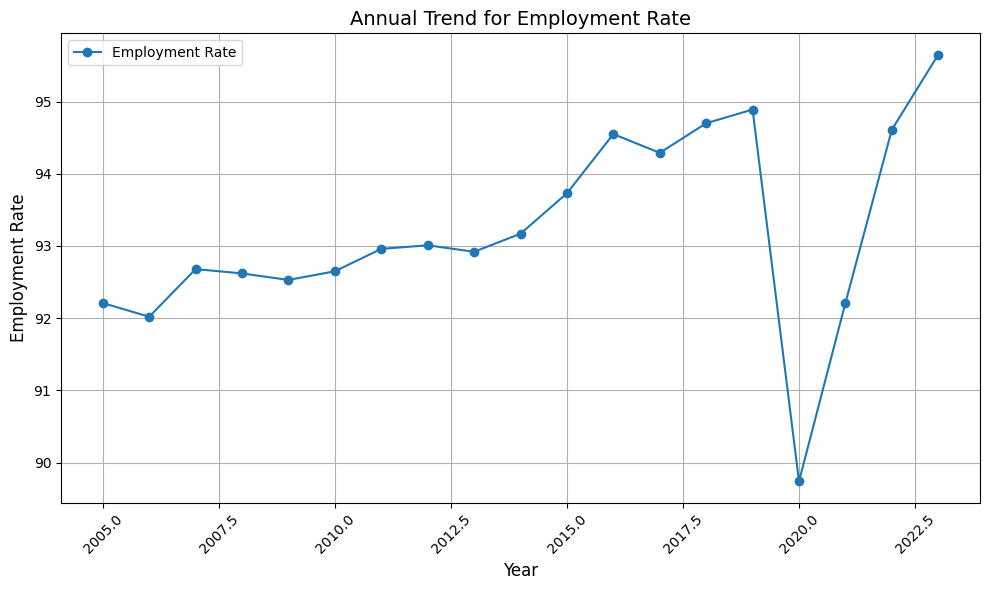

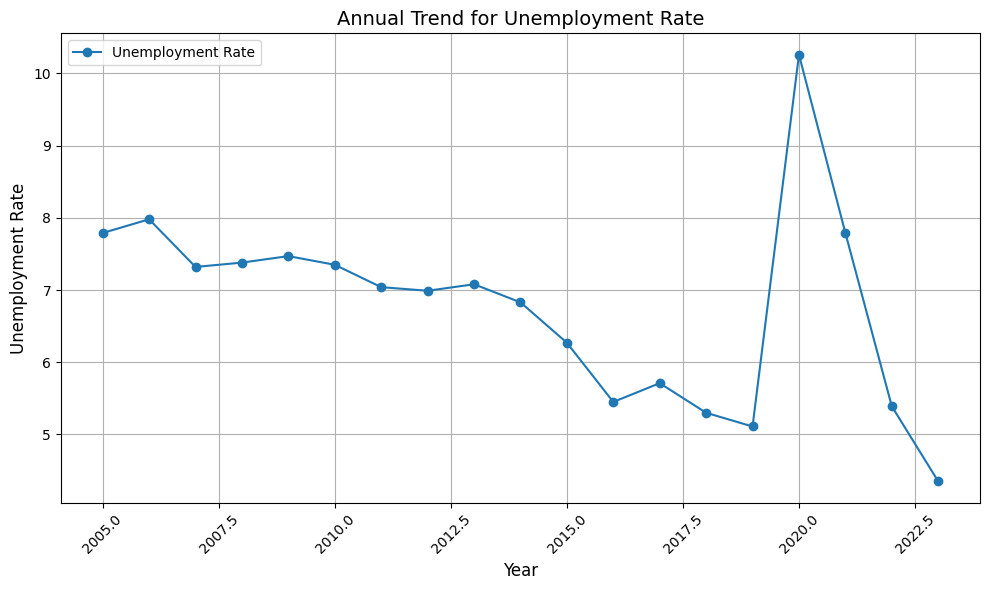

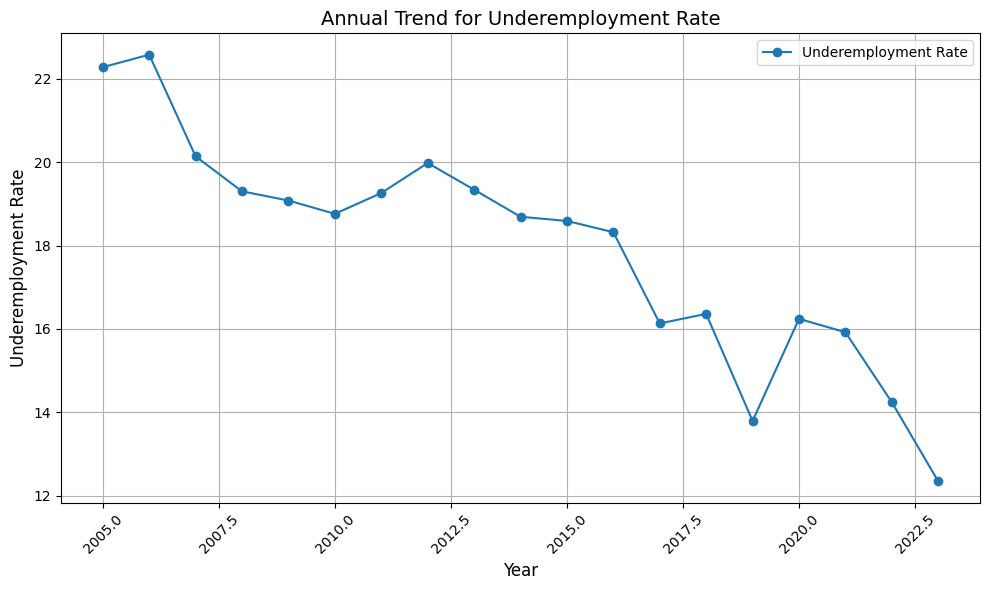

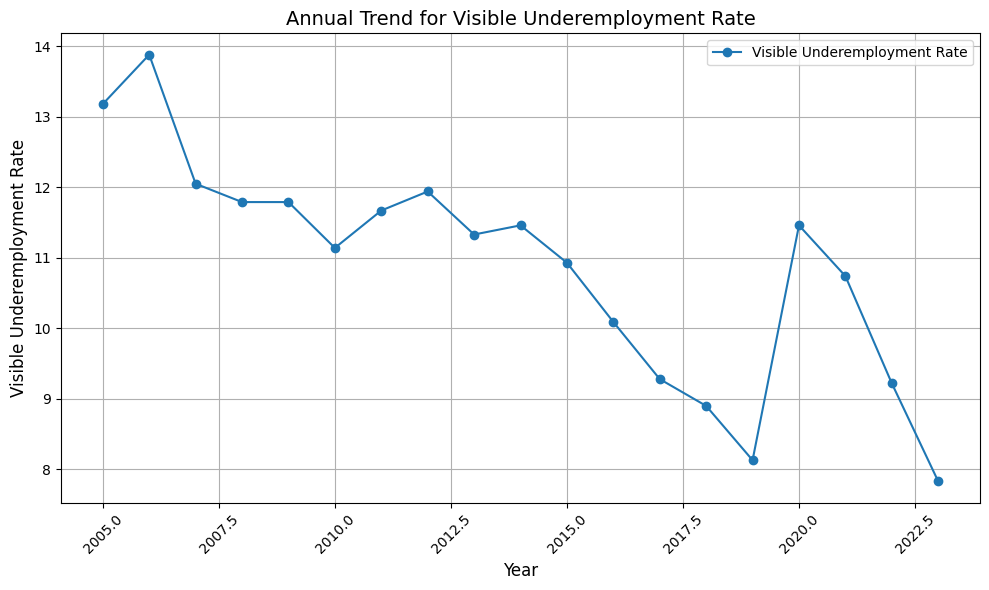

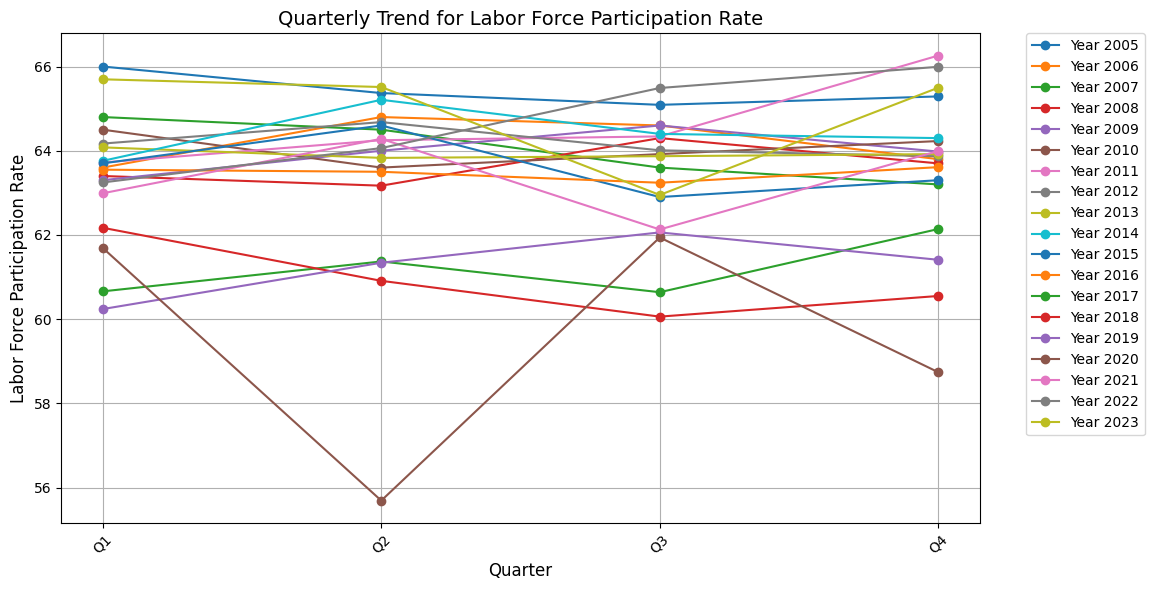

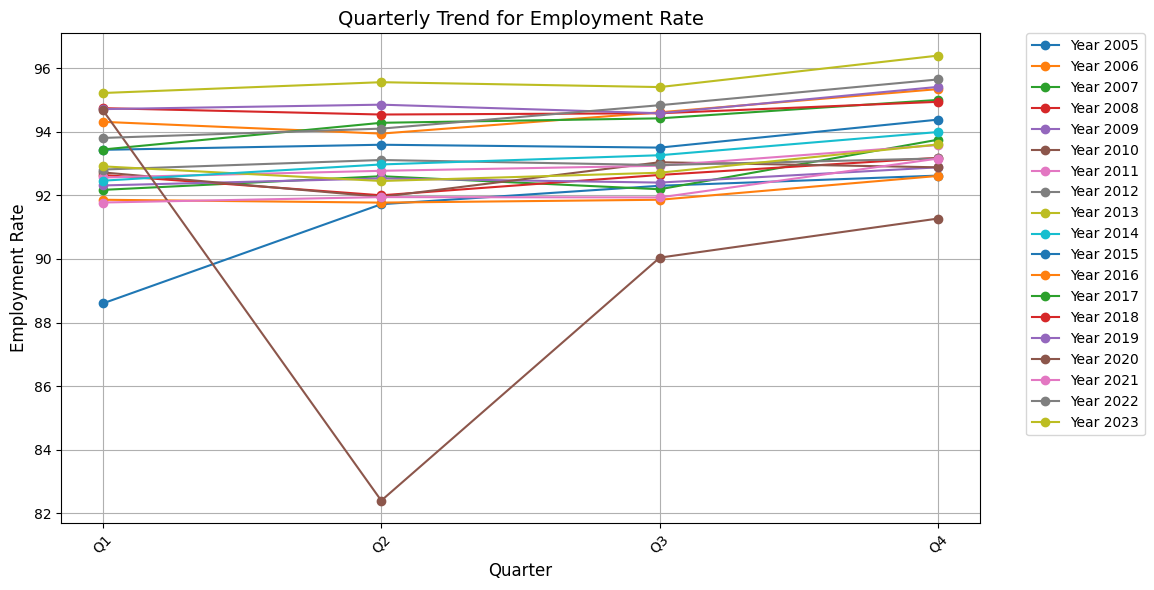

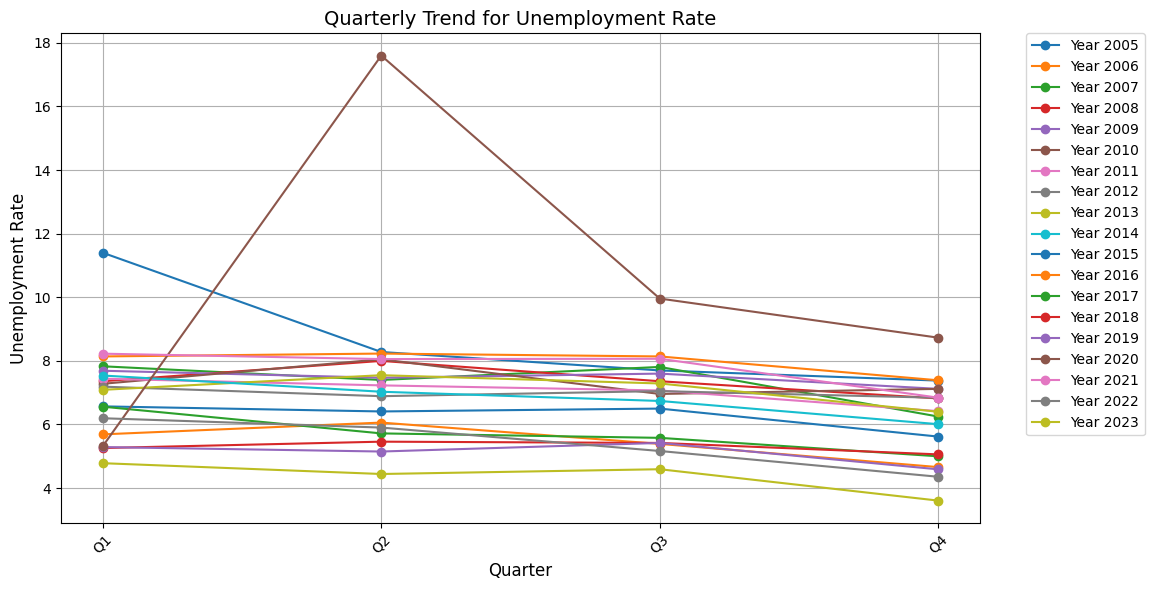

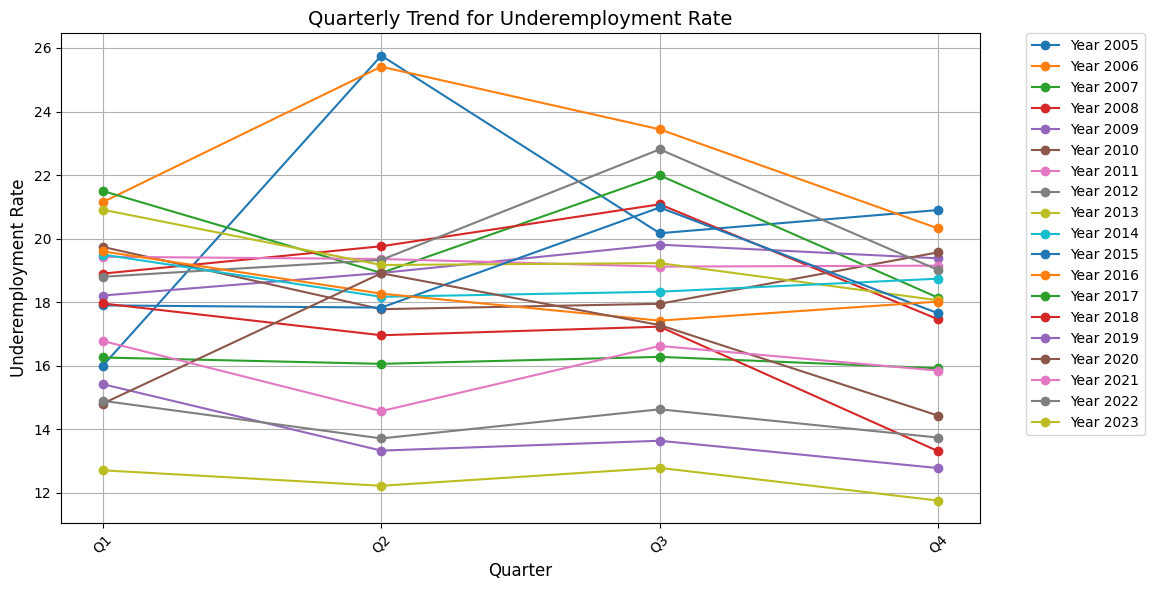

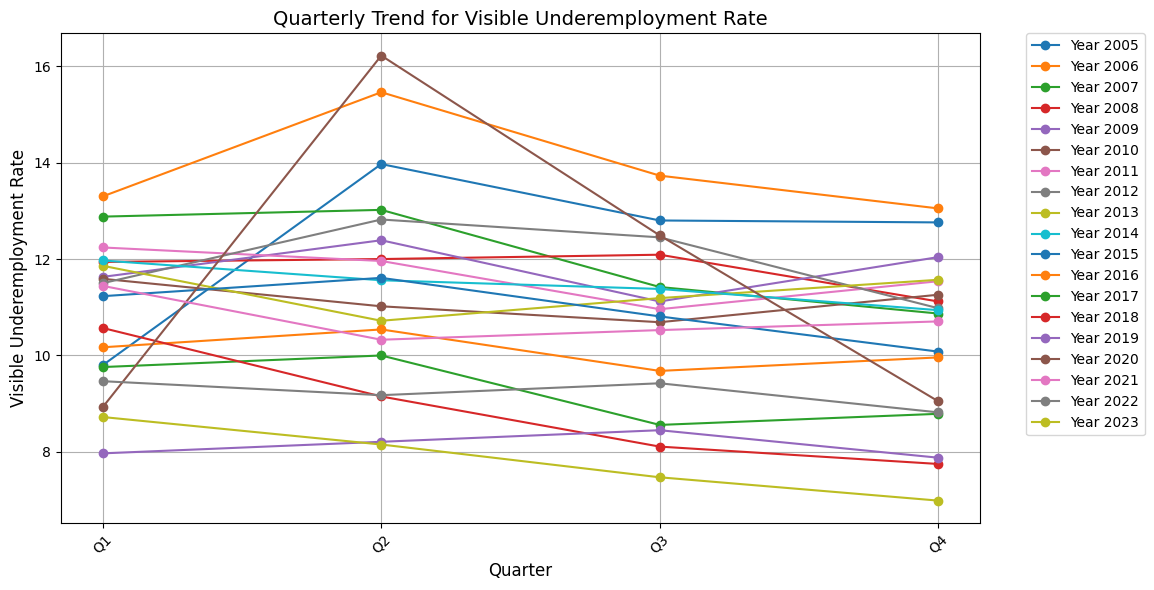

In [23]:
# Trend for each rate for both quarterly and annually
numeric_columns = [
    "Labor Force Participation Rate", 
    "Employment Rate", 
    "Unemployment Rate", 
    "Underemployment Rate", 
    "Visible Underemployment Rate"
]

annual_trends = annual_data.groupby("Year")[numeric_columns].mean()

quarterly_trends = monthly_data.groupby(["Year", "Quarter"])[numeric_columns].mean()

all_quarters = ["Q1", "Q2", "Q3", "Q4"]

years_with_all_quarters = pd.MultiIndex.from_product(
    [monthly_data["Year"].unique(), all_quarters], 
    names=["Year", "Quarter"]
)

quarterly_trends = quarterly_trends.reindex(years_with_all_quarters, fill_value=0)

annual_trends.to_csv("AnnualTrends.csv")
quarterly_trends.to_csv("QuarterlyTrends.csv")

for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    plt.plot(annual_trends.index, annual_trends[column], marker='o', label=column)
    plt.title(f'Annual Trend for {column}', fontsize=14)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel(column, fontsize=12)
    plt.grid()
    plt.legend()

    plt.xticks(rotation=45)
    plt.tight_layout()

    plt.savefig(f"Annual_Trend_{column.replace(' ', '_')}.png")
    plt.show()

for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    for year in quarterly_trends.index.get_level_values("Year").unique():
        year_data = quarterly_trends.xs(year, level="Year")
        plt.plot(year_data.index, year_data[column], marker='o', label=f'Year {year}')
    plt.title(f'Quarterly Trend for {column}', fontsize=14)
    plt.xlabel('Quarter', fontsize=12)
    plt.ylabel(column, fontsize=12)
    plt.grid()

    plt.xticks(rotation=45)
    plt.tight_layout()

    plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)

    plt.savefig(f"Quarterly_Trend_{column.replace(' ', '_')}.png")
    plt.show()



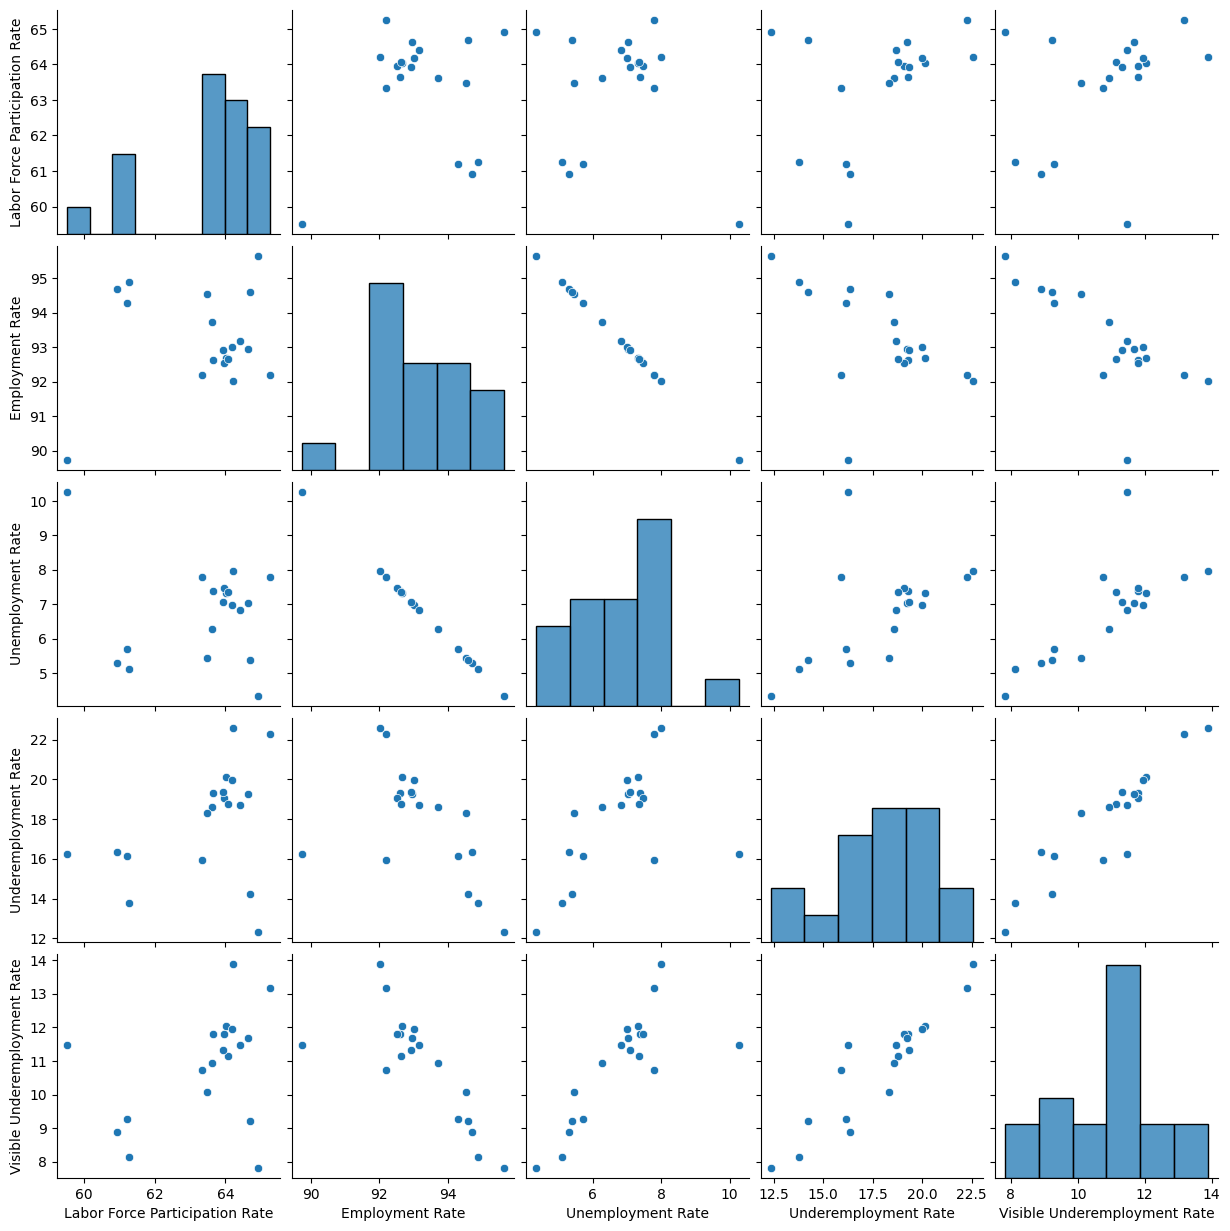

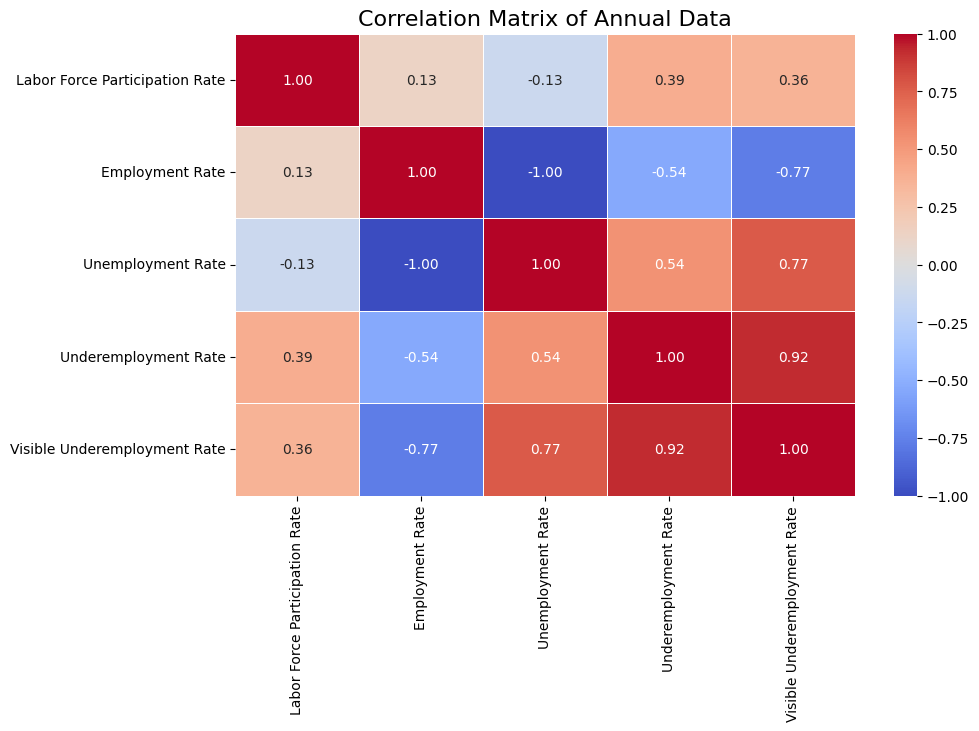

                                Labor Force Participation Rate  \
Labor Force Participation Rate                        1.000000   
Employment Rate                                       0.128557   
Unemployment Rate                                    -0.128557   
Underemployment Rate                                  0.391569   
Visible Underemployment Rate                          0.359477   

                                Employment Rate  Unemployment Rate  \
Labor Force Participation Rate         0.128557          -0.128557   
Employment Rate                        1.000000          -1.000000   
Unemployment Rate                     -1.000000           1.000000   
Underemployment Rate                  -0.535407           0.535407   
Visible Underemployment Rate          -0.769272           0.769272   

                                Underemployment Rate  \
Labor Force Participation Rate              0.391569   
Employment Rate                            -0.535407   
Unemployment R

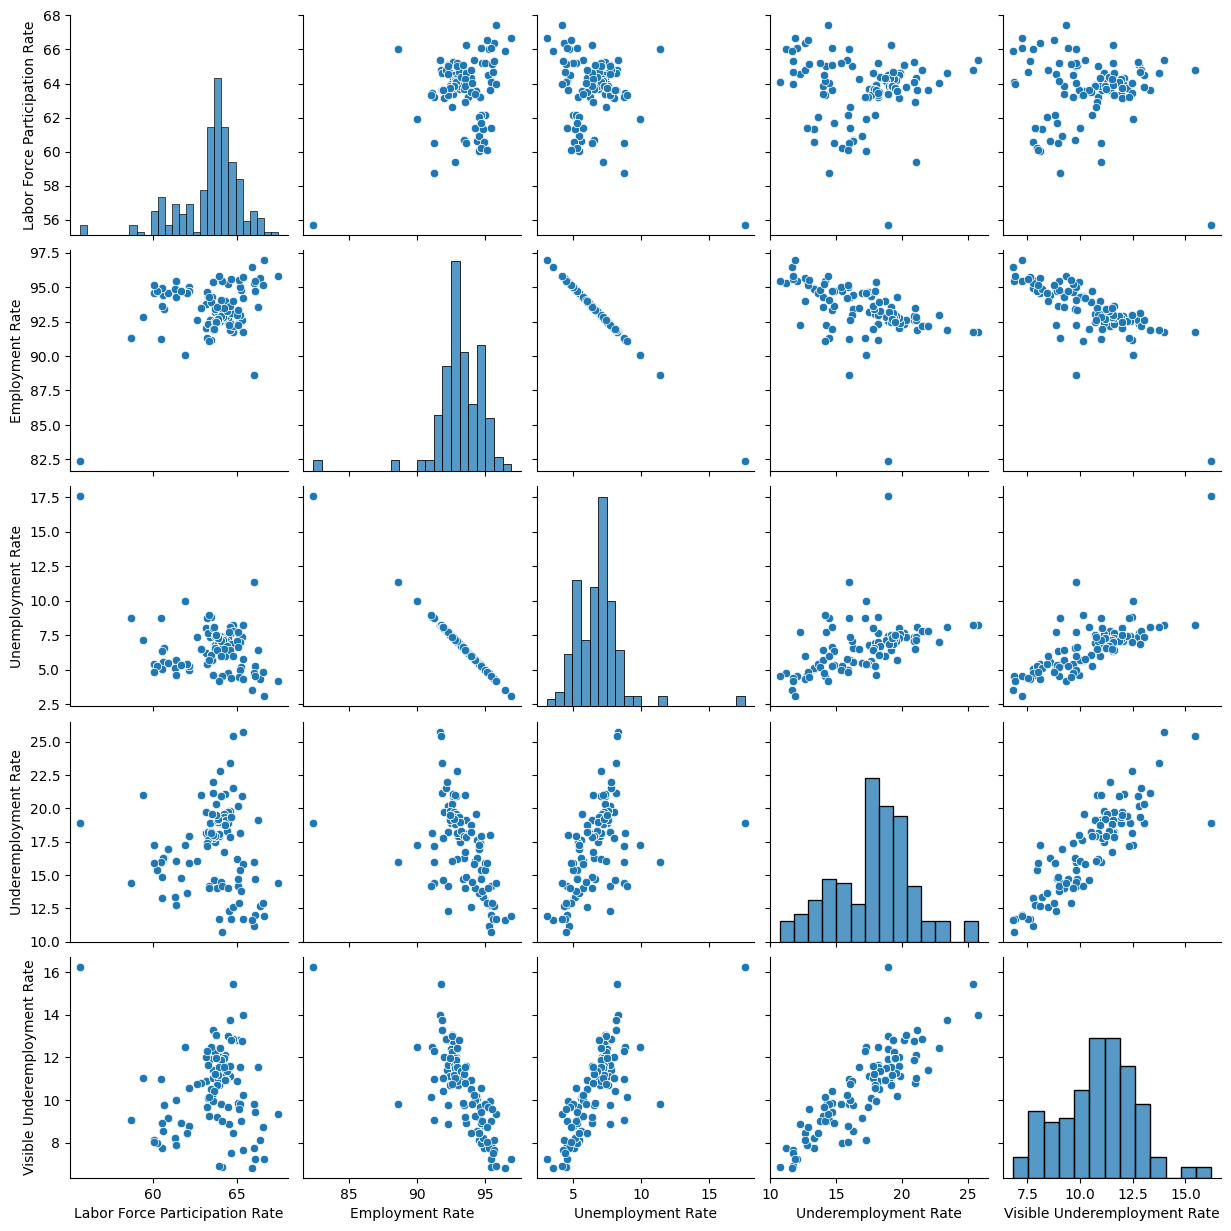

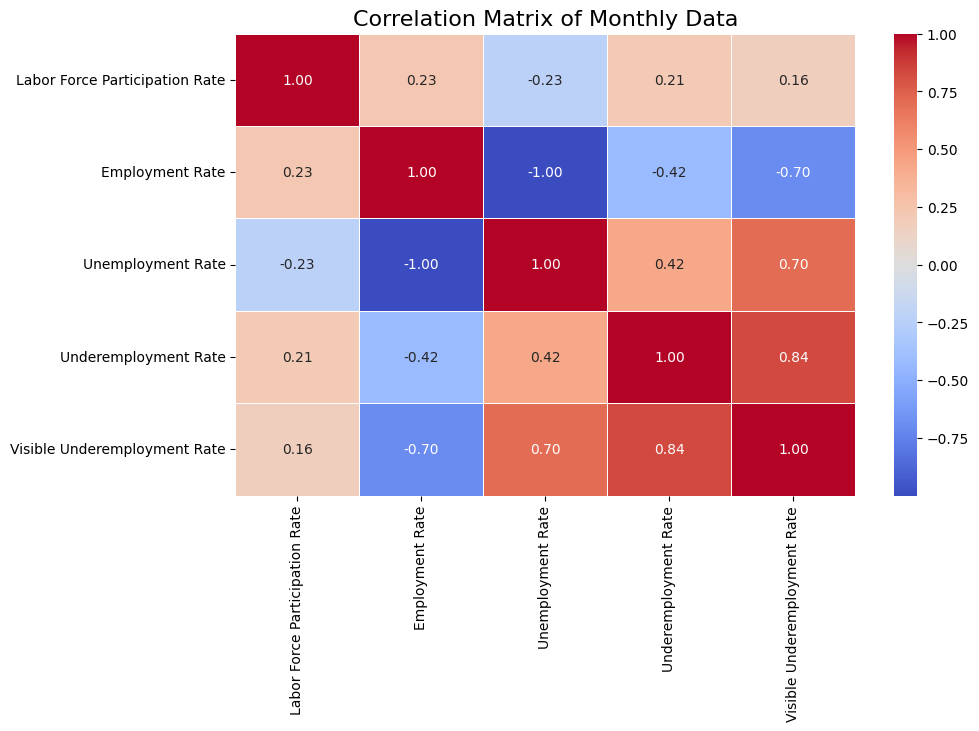

                                Labor Force Participation Rate  \
Labor Force Participation Rate                        1.000000   
Employment Rate                                       0.230650   
Unemployment Rate                                    -0.230658   
Underemployment Rate                                  0.205335   
Visible Underemployment Rate                          0.164281   

                                Employment Rate  Unemployment Rate  \
Labor Force Participation Rate         0.230650          -0.230658   
Employment Rate                        1.000000          -1.000000   
Unemployment Rate                     -1.000000           1.000000   
Underemployment Rate                  -0.423265           0.423302   
Visible Underemployment Rate          -0.698989           0.699011   

                                Underemployment Rate  \
Labor Force Participation Rate              0.205335   
Employment Rate                            -0.423265   
Unemployment R

In [24]:
sns.pairplot(annual_data, vars=numeric_columns)
plt.show()

correlation_matrix = annual_data[numeric_columns].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Annual Data', fontsize=16)
plt.show()

correlations = annual_data[numeric_columns].corr()
print(correlations)

sns.pairplot(monthly_data, vars=numeric_columns)
plt.show()

correlation_matrix = monthly_data[numeric_columns].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Monthly Data', fontsize=16)
plt.show()

correlations = monthly_data[numeric_columns].corr()
print(correlations)

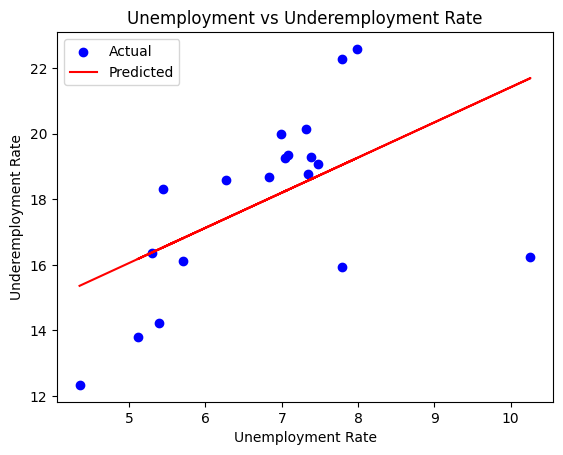

Slope: 1.0711086141088504, Intercept: 10.700891788733347
R-squared: 0.28666013177934235


In [25]:
from sklearn.linear_model import LinearRegression
import numpy as np

# For Annually
X = annual_data['Unemployment Rate'].values.reshape(-1, 1)
y = annual_data['Underemployment Rate'].values.reshape(-1, 1)

# Linear regression
model = LinearRegression()
model.fit(X, y)

# Predictions
y_pred = model.predict(X)

# Plot results
plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, y_pred, color='red', label='Predicted')
plt.xlabel('Unemployment Rate')
plt.ylabel('Underemployment Rate')
plt.title('Unemployment vs Underemployment Rate')
plt.legend()
plt.show()

# Model parameters
print(f"Slope: {model.coef_[0][0]}, Intercept: {model.intercept_[0]}")
print(f"R-squared: {model.score(X, y)}")


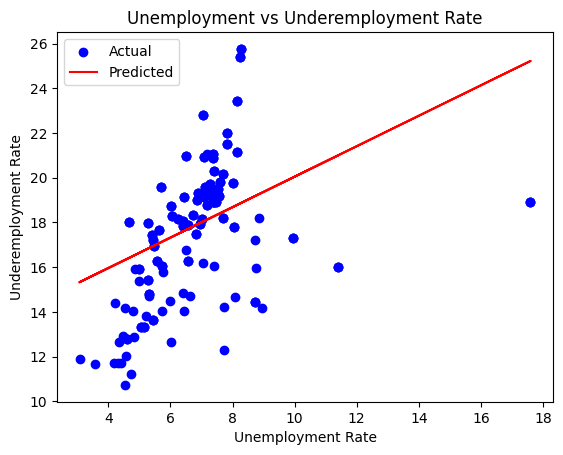

Slope: 0.6809307197255146, Intercept: 13.23613583556865
R-squared: 0.17918453960545788


In [26]:
# For monthly
X = df['Unemployment Rate'].values.reshape(-1, 1)
y = df['Underemployment Rate'].values.reshape(-1, 1)

# Linear regression
model = LinearRegression()
model.fit(X, y)

# Predictions
y_pred = model.predict(X)

# Plot results
plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, y_pred, color='red', label='Predicted')
plt.xlabel('Unemployment Rate')
plt.ylabel('Underemployment Rate')
plt.title('Unemployment vs Underemployment Rate')
plt.legend()
plt.show()

# Model parameters
print(f"Slope: {model.coef_[0][0]}, Intercept: {model.intercept_[0]}")
print(f"R-squared: {model.score(X, y)}")

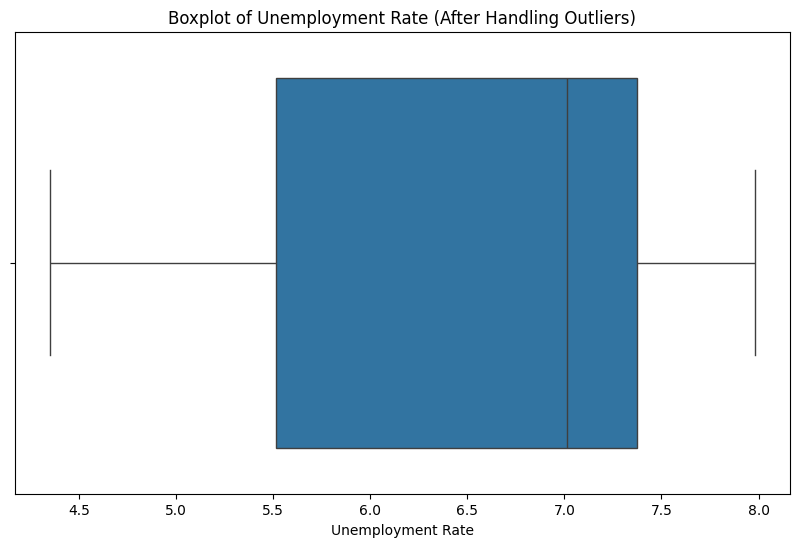

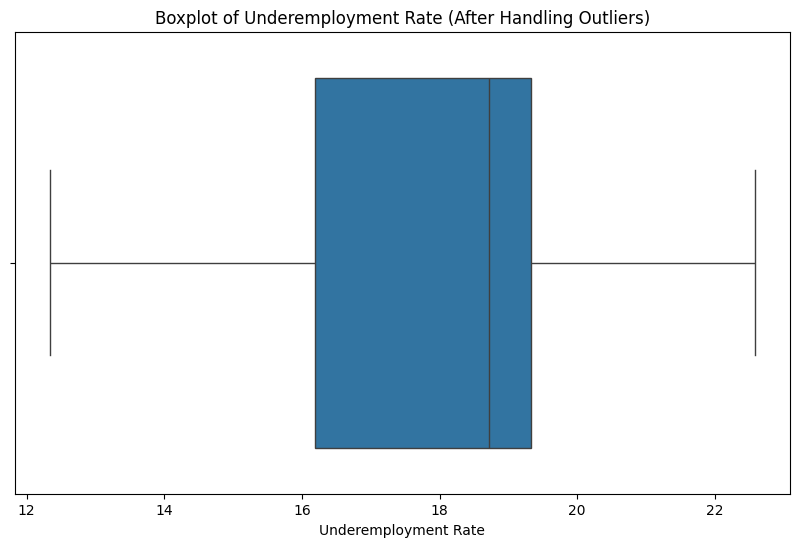

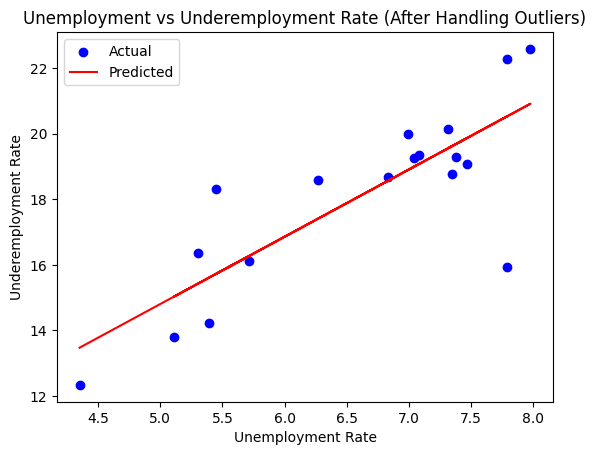

Slope: 2.048611503137417, Intercept: 4.563037540439019
R-squared: 0.6614313664340539


In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression

# Sample data (replace with your actual dataset)
# annual_data = pd.read_csv('your_data.csv')

# Calculate Z-scores for both 'Unemployment Rate' and 'Underemployment Rate'
unemployment_z = zscore(annual_data['Unemployment Rate'])
underemployment_z = zscore(annual_data['Underemployment Rate'])

# Identify outliers (Z-score > 3 or < -3)
unemployment_outliers = annual_data[abs(unemployment_z) > 3]
underemployment_outliers = annual_data[abs(underemployment_z) > 3]

# Option 1: Remove outliers based on Z-score
# annual_data_cleaned = annual_data[(abs(unemployment_z) <= 3) & (abs(underemployment_z) <= 3)]

# Calculate Q1 and Q3 for both 'Unemployment Rate' and 'Underemployment Rate'
Q1_unemployment = annual_data['Unemployment Rate'].quantile(0.25)
Q3_unemployment = annual_data['Unemployment Rate'].quantile(0.75)
IQR_unemployment = Q3_unemployment - Q1_unemployment

Q1_underemployment = annual_data['Underemployment Rate'].quantile(0.25)
Q3_underemployment = annual_data['Underemployment Rate'].quantile(0.75)
IQR_underemployment = Q3_underemployment - Q1_underemployment

# Identify outliers based on IQR
unemployment_outliers = annual_data[
    (annual_data['Unemployment Rate'] < (Q1_unemployment - 1.5 * IQR_unemployment)) |
    (annual_data['Unemployment Rate'] > (Q3_unemployment + 1.5 * IQR_unemployment))
]

underemployment_outliers = annual_data[
    (annual_data['Underemployment Rate'] < (Q1_underemployment - 1.5 * IQR_underemployment)) |
    (annual_data['Underemployment Rate'] > (Q3_underemployment + 1.5 * IQR_underemployment))
]

# Option 1: Remove outliers using IQR method
annual_data_cleaned = annual_data[
    (annual_data['Unemployment Rate'] >= (Q1_unemployment - 1.5 * IQR_unemployment)) &
    (annual_data['Unemployment Rate'] <= (Q3_unemployment + 1.5 * IQR_unemployment)) &
    (annual_data['Underemployment Rate'] >= (Q1_underemployment - 1.5 * IQR_underemployment)) &
    (annual_data['Underemployment Rate'] <= (Q3_underemployment + 1.5 * IQR_underemployment))
]

# Option 2: Replace outliers with the median (if desired)
# annual_data['Unemployment Rate'] = annual_data['Unemployment Rate'].apply(
#     lambda x: annual_data['Unemployment Rate'].median() if x < (Q1_unemployment - 1.5 * IQR_unemployment) or x > (Q3_unemployment + 1.5 * IQR_unemployment) else x)
# annual_data['Underemployment Rate'] = annual_data['Underemployment Rate'].apply(
#     lambda x: annual_data['Underemployment Rate'].median() if x < (Q1_underemployment - 1.5 * IQR_underemployment) or x > (Q3_underemployment + 1.5 * IQR_underemployment) else x)

# Boxplot for Unemployment Rate
plt.figure(figsize=(10, 6))
sns.boxplot(x=annual_data_cleaned['Unemployment Rate'])
plt.title('Boxplot of Unemployment Rate (After Handling Outliers)')
plt.show()

# Boxplot for Underemployment Rate
plt.figure(figsize=(10, 6))
sns.boxplot(x=annual_data_cleaned['Underemployment Rate'])
plt.title('Boxplot of Underemployment Rate (After Handling Outliers)')
plt.show()

# Use the cleaned data (after handling outliers)
X = annual_data_cleaned['Unemployment Rate'].values.reshape(-1, 1)
y = annual_data_cleaned['Underemployment Rate'].values.reshape(-1, 1)

# Linear regression
model = LinearRegression()
model.fit(X, y)

# Predictions
y_pred = model.predict(X)

# Plot results
plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, y_pred, color='red', label='Predicted')
plt.xlabel('Unemployment Rate')
plt.ylabel('Underemployment Rate')
plt.title('Unemployment vs Underemployment Rate (After Handling Outliers)')
plt.legend()
plt.show()

# Model parameters
print(f"Slope: {model.coef_[0][0]}, Intercept: {model.intercept_[0]}")
print(f"R-squared: {model.score(X, y)}")


In [28]:
# Check for non-numeric values
print(monthly_data['Unemployment Rate'].dtype)
print(monthly_data['Underemployment Rate'].dtype)

# Convert to numeric (if needed)
monthly_data['Unemployment Rate'] = pd.to_numeric(monthly_data['Unemployment Rate'], errors='coerce')
monthly_data['Underemployment Rate'] = pd.to_numeric(monthly_data['Underemployment Rate'], errors='coerce')


float64
float64


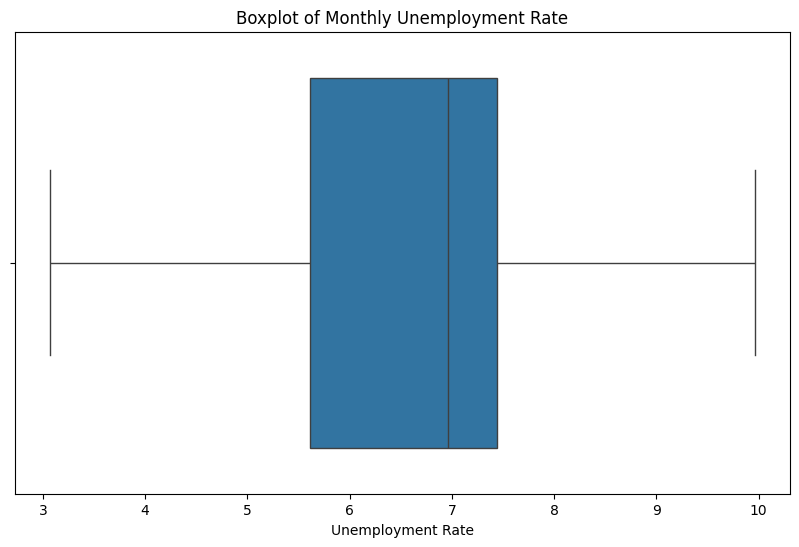

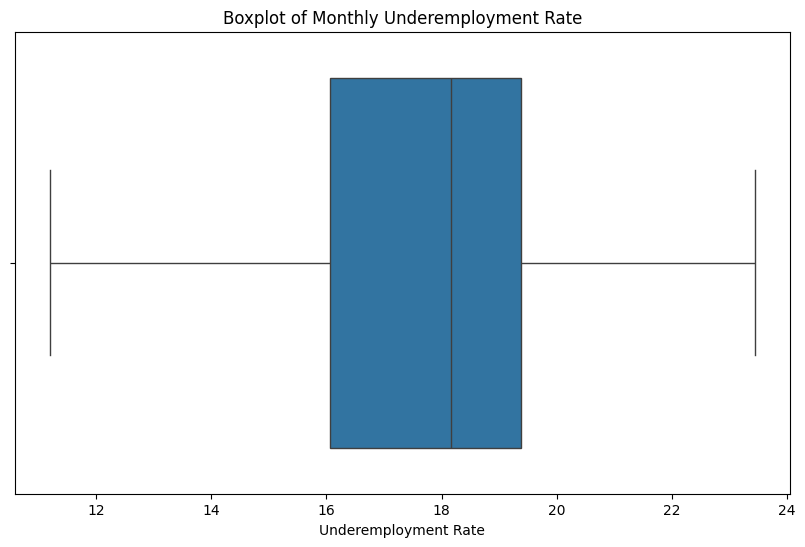

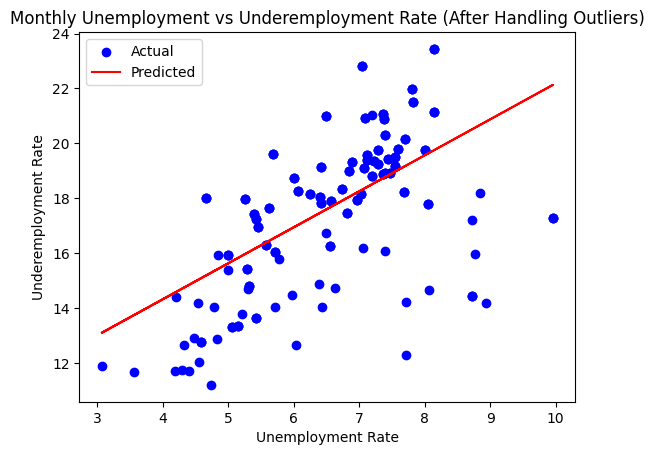

Slope: 1.3101153925239166, Intercept: 9.081298726000703
R-squared: 0.3571725259069082


In [29]:
# For monthly
from scipy.stats import zscore

# Calculate Z-scores for the monthly 'Unemployment Rate' and 'Underemployment Rate'
unemployment_z_monthly = zscore(monthly_data['Unemployment Rate'])
underemployment_z_monthly = zscore(monthly_data['Underemployment Rate'])

# Identify outliers (Z-score > 3 or < -3)
unemployment_outliers_monthly = monthly_data[abs(unemployment_z_monthly) > 3]
underemployment_outliers_monthly = monthly_data[abs(underemployment_z_monthly) > 3]

# Option 1: Remove outliers
monthly_data_cleaned = monthly_data[(abs(unemployment_z_monthly) <= 3) & (abs(underemployment_z_monthly) <= 3)]

# Option 2: Replace outliers with the median
monthly_data['Unemployment Rate'] = monthly_data['Unemployment Rate'].apply(
    lambda x: monthly_data['Unemployment Rate'].median() if abs(zscore([x])) > 3 else x)
monthly_data['Underemployment Rate'] = monthly_data['Underemployment Rate'].apply(
    lambda x: monthly_data['Underemployment Rate'].median() if abs(zscore([x])) > 3 else x)

# Calculate Q1 and Q3 for the monthly 'Unemployment Rate' and 'Underemployment Rate'
Q1_unemployment_monthly = monthly_data['Unemployment Rate'].quantile(0.25)
Q3_unemployment_monthly = monthly_data['Unemployment Rate'].quantile(0.75)
IQR_unemployment_monthly = Q3_unemployment_monthly - Q1_unemployment_monthly

Q1_underemployment_monthly = monthly_data['Underemployment Rate'].quantile(0.25)
Q3_underemployment_monthly = monthly_data['Underemployment Rate'].quantile(0.75)
IQR_underemployment_monthly = Q3_underemployment_monthly - Q1_underemployment_monthly

# Identify outliers based on IQR
unemployment_outliers_monthly = monthly_data[(monthly_data['Unemployment Rate'] < (Q1_unemployment_monthly - 1.5 * IQR_unemployment_monthly)) |
                                             (monthly_data['Unemployment Rate'] > (Q3_unemployment_monthly + 1.5 * IQR_unemployment_monthly))]

underemployment_outliers_monthly = monthly_data[(monthly_data['Underemployment Rate'] < (Q1_underemployment_monthly - 1.5 * IQR_underemployment_monthly)) |
                                                (monthly_data['Underemployment Rate'] > (Q3_underemployment_monthly + 1.5 * IQR_underemployment_monthly))]

# Option 1: Remove outliers
monthly_data_cleaned = monthly_data[
    (monthly_data['Unemployment Rate'] >= (Q1_unemployment_monthly - 1.5 * IQR_unemployment_monthly)) &
    (monthly_data['Unemployment Rate'] <= (Q3_unemployment_monthly + 1.5 * IQR_unemployment_monthly)) &
    (monthly_data['Underemployment Rate'] >= (Q1_underemployment_monthly - 1.5 * IQR_underemployment_monthly)) &
    (monthly_data['Underemployment Rate'] <= (Q3_underemployment_monthly + 1.5 * IQR_underemployment_monthly))
]

# Option 2: Replace outliers with the median
monthly_data['Unemployment Rate'] = monthly_data['Unemployment Rate'].apply(
    lambda x: monthly_data['Unemployment Rate'].median() if x < (Q1_unemployment_monthly - 1.5 * IQR_unemployment_monthly) or x > (Q3_unemployment_monthly + 1.5 * IQR_unemployment_monthly) else x)
monthly_data['Underemployment Rate'] = monthly_data['Underemployment Rate'].apply(
    lambda x: monthly_data['Underemployment Rate'].median() if x < (Q1_underemployment_monthly - 1.5 * IQR_underemployment_monthly) or x > (Q3_underemployment_monthly + 1.5 * IQR_underemployment_monthly) else x)

import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for Monthly Unemployment Rate
plt.figure(figsize=(10, 6))
sns.boxplot(x=monthly_data['Unemployment Rate'])
plt.title('Boxplot of Monthly Unemployment Rate')
plt.show()

# Boxplot for Monthly Underemployment Rate
plt.figure(figsize=(10, 6))
sns.boxplot(x=monthly_data['Underemployment Rate'])
plt.title('Boxplot of Monthly Underemployment Rate')
plt.show()

from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Use the cleaned monthly data
X_monthly = monthly_data_cleaned['Unemployment Rate'].values.reshape(-1, 1)
y_monthly = monthly_data_cleaned['Underemployment Rate'].values.reshape(-1, 1)

# Linear regression
model = LinearRegression()
model.fit(X_monthly, y_monthly)

# Predictions
y_pred_monthly = model.predict(X_monthly)

# Plot results
plt.scatter(X_monthly, y_monthly, color='blue', label='Actual')
plt.plot(X_monthly, y_pred_monthly, color='red', label='Predicted')
plt.xlabel('Unemployment Rate')
plt.ylabel('Underemployment Rate')
plt.title('Monthly Unemployment vs Underemployment Rate (After Handling Outliers)')
plt.legend()
plt.show()

# Model parameters
print(f"Slope: {model.coef_[0][0]}, Intercept: {model.intercept_[0]}")
print(f"R-squared: {model.score(X_monthly, y_monthly)}")


Predicted Unemployment Rate for 2024: 5.747192982456113


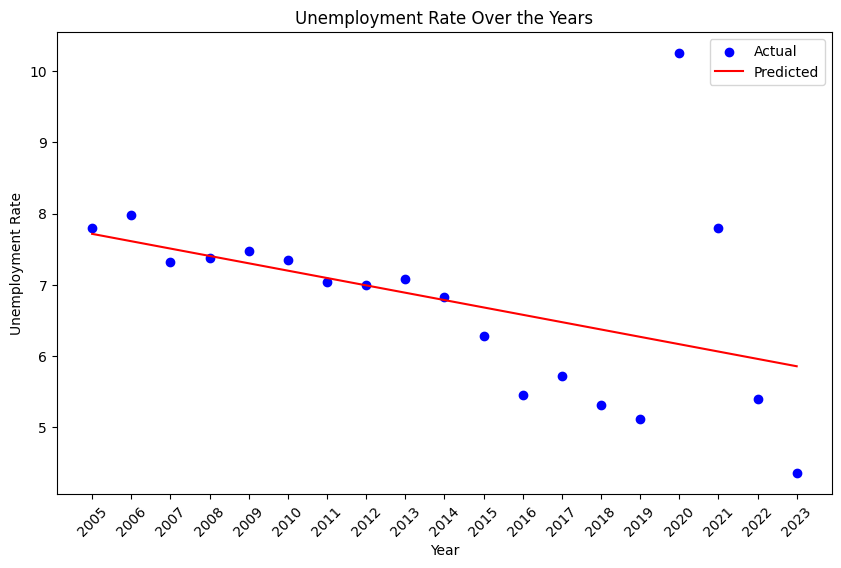

Slope: -0.10349122807017543
Intercept: 215.2134385964912
R-squared: 0.1836764089870092


In [32]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Load data
data = """
Year,Month,Labor Force Participation Rate,Employment Rate,Unemployment Rate,Underemployment Rate,Visible Underemployment Rate,MonthNum,Quarter
2005,Annual,65.25,92.21,7.79,22.28,13.18,0.0,
2006,Annual,64.2,92.02,7.98,22.58,13.88,0.0,
2007,Annual,64.03,92.68,7.32,20.14,12.05,0.0,
2008,Annual,63.64,92.62,7.38,19.3,11.79,0.0,
2009,Annual,63.97,92.53,7.47,19.08,11.79,0.0,
2010,Annual,64.06,92.65,7.35,18.76,11.14,0.0,
2011,Annual,64.64,92.96,7.04,19.26,11.67,0.0,
2012,Annual,64.18,93.01,6.99,19.98,11.94,0.0,
2013,Annual,63.92,92.92,7.08,19.34,11.33,0.0,
2014,Annual,64.42,93.17,6.83,18.69,11.46,0.0,
2015,Annual,63.63,93.73,6.27,18.59,10.93,0.0,
2016,Annual,63.48,94.55,5.45,18.32,10.09,0.0,
2017,Annual,61.2,94.29,5.71,16.13,9.28,0.0,
2018,Annual,60.92,94.7,5.3,16.36,8.9,0.0,
2019,Annual,61.26,94.89,5.11,13.79,8.13,0.0,
2020,Annual,59.52,89.74,10.26,16.24,11.46,0.0,
2021,Annual,63.35,92.21,7.79,15.92,10.74,0.0,
2022,Annual,64.7,94.61,5.39,14.24,9.22,0.0,
2023,Annual,64.91,95.65,4.35,12.34,7.83,0.0
"""

# Convert string data to DataFrame
from io import StringIO
df = pd.read_csv(StringIO(data))

# Filter the data to include only annual entries and extract relevant columns
df_annual = df[df['Month'] == 'Annual'][['Year', 'Unemployment Rate']]

# Independent variable (X): Year
X = df_annual['Year'].values.reshape(-1, 1)

# Dependent variable (y): Unemployment Rate
y = df_annual['Unemployment Rate'].values

# Linear regression model
model = LinearRegression()
model.fit(X, y)

# Prediction for the year 2024
future_year = np.array([2024]).reshape(-1, 1)
predicted_unemployment_rate_2024 = model.predict(future_year)

# Output the prediction for 2024
print(f"Predicted Unemployment Rate for 2024: {predicted_unemployment_rate_2024[0]}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(df_annual['Year'], df_annual['Unemployment Rate'], color='blue', label='Actual')
plt.plot(df_annual['Year'], model.predict(X), color='red', label='Predicted')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.title('Unemployment Rate Over the Years')
plt.xticks(df_annual['Year'], rotation=45)
plt.legend()
plt.show()

# Model parameters
print(f"Slope: {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")
print(f"R-squared: {model.score(X, y)}")


Predicted Unemployment Rate for 2024 (after handling outliers): 5.02%


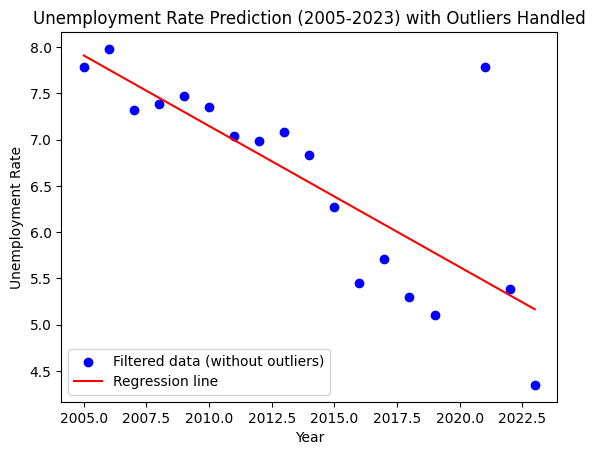

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the CSV file
df2 = pd.read_csv('AnnualLaborForceData.csv')

# Extract relevant columns for the model: 'Year' and 'Unemployment Rate'
df2 = df2[['Year', 'Unemployment Rate']]

# Calculate Q1, Q3, and IQR for identifying outliers
Q1 = df2['Unemployment Rate'].quantile(0.25)
Q3 = df2['Unemployment Rate'].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df2_filtered = df2[(df2['Unemployment Rate'] >= lower_bound) & (df2['Unemployment Rate'] <= upper_bound)]

# Prepare the data for the model
X_filtered = df2_filtered['Year'].values.reshape(-1, 1)  # Feature: Year
y_filtered = df2_filtered['Unemployment Rate'].values    # Target: Unemployment Rate

# Initialize and train the model
model = LinearRegression()
model.fit(X_filtered, y_filtered)

# Predict the unemployment rate for 2024
year_2024 = np.array([[2024]])  # Input for the prediction
prediction_2024 = model.predict(year_2024)

# Print the predicted unemployment rate for 2024
print(f"Predicted Unemployment Rate for 2024 (after handling outliers): {prediction_2024[0]:.2f}%")

# Plot the data and the regression line
plt.scatter(X_filtered, y_filtered, color='blue', label='Filtered data (without outliers)')
plt.plot(X_filtered, model.predict(X_filtered), color='red', label='Regression line')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.title('Unemployment Rate Prediction (2005-2023) with Outliers Handled')
plt.legend()
plt.show()


Predicted Unemployment Rate for 2024: 5.75%


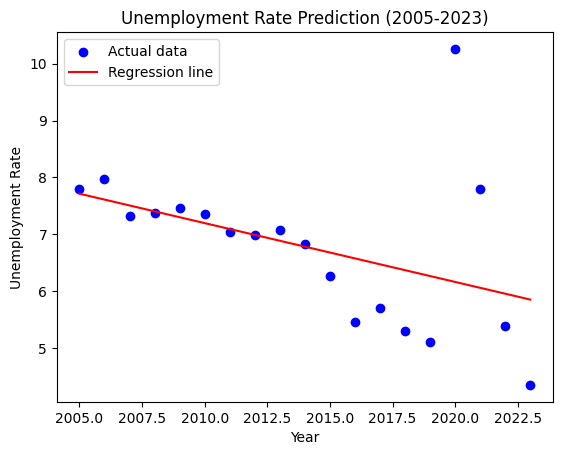

In [35]:
# Load the CSV file
df2 = pd.read_csv('AnnualLaborForceData.csv')

# Extract relevant columns for the model: 'Year' and 'Unemployment Rate'
df2 = df2[['Year', 'Unemployment Rate']]

# Prepare the data
X = df2['Year'].values.reshape(-1, 1)  # Feature: Year
y = df2['Unemployment Rate'].values    # Target: Unemployment Rate

# Initialize and train the model
model = LinearRegression()
model.fit(X, y)

# Predict the unemployment rate for 2024
year_2024 = np.array([[2024]])  # Input for the prediction
prediction_2024 = model.predict(year_2024)
print(f"Predicted Unemployment Rate for 2024: {prediction_2024[0]:.2f}%")

# Plot the data and the regression line
plt.scatter(X, y, color='blue', label='Actual data')
plt.plot(X, model.predict(X), color='red', label='Regression line')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.title('Unemployment Rate Prediction (2005-2023)')
plt.legend()
plt.show()



In [ ]:
# Predicting Underemployment Rate Given an undemployment rate for 2024

# Given values for slope and intercept
# Slope and intercept for yearly and monthly predictions (without handling outliers)
slope_yearly_without_outliers = 1.0711086141088504
intercept_yearly_without_outliers = 10.700891788733347

slope_monthly_without_outliers = 0.6809307197255146
intercept_monthly_without_outliers = 13.23613583556865

# Slope and intercept for yearly and monthly predictions (after handling outliers)
slope_yearly_with_outliers = 2.048611503137417
intercept_yearly_with_outliers = 4.563037540439019

slope_monthly_with_outliers = 1.3101153925239166
intercept_monthly_with_outliers = 9.081298726000703

# Assumed Unemployment Rate for 2024 (e.g., 5.5%)
unemployment_rate_2024 = 5.02

# Prediction Formula: Prediction = (Slope * Unemployment Rate) + Intercept

# **Prediction Without Handling Outliers**
prediction_yearly_without_outliers = (slope_yearly_without_outliers * unemployment_rate_2024) + intercept_yearly_without_outliers
prediction_monthly_without_outliers = (slope_monthly_without_outliers * unemployment_rate_2024) + intercept_monthly_without_outliers

# **Prediction After Handling Outliers**
prediction_yearly_with_outliers = (slope_yearly_with_outliers * unemployment_rate_2024) + intercept_yearly_with_outliers
prediction_monthly_with_outliers = (slope_monthly_with_outliers * unemployment_rate_2024) + intercept_monthly_with_outliers

# Print the predictions
print(f"Prediction for 2024 (Yearly) without handling outliers: {prediction_yearly_without_outliers}")
print(f"Prediction for 2024 (Monthly) without handling outliers: {prediction_monthly_without_outliers}")
print(f"Prediction for 2024 (Yearly) after handling outliers: {prediction_yearly_with_outliers}")
print(f"Prediction for 2024 (Monthly) after handling outliers: {prediction_monthly_with_outliers}")


Prediction for 2024 (Yearly) without handling outliers: 16.591989166332024
Prediction for 2024 (Monthly) without handling outliers: 16.98125479405898
Prediction for 2024 (Yearly) after handling outliers: 15.830400807694812
Prediction for 2024 (Monthly) after handling outliers: 16.286933384882246
